In [1]:
!pip install seaborn
!pip install scikit-learn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import datetime
from sklearn.model_selection import GridSearchCV
import numpy as np

In [3]:
# Cargar datos
train = pd.read_csv("/kaggle/input/prac5-ia-unne-2025/train.csv")
print(train.head())


   id   Row#  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0   0  346.0       12.5      0.25     0.25     0.75   0.63              69.7   
1   1  707.0       25.0      0.50     0.38     0.50   0.50              69.7   
2   2   42.0       12.5      0.25     0.25     0.25   0.25              86.0   
3   3  532.0       25.0      0.50     0.25     0.50   0.75              69.7   
4   4  380.0       12.5      0.25     0.38     0.38   0.75              86.0   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              42.1                  58.2              50.2              24.3   
1              42.1                  58.2              50.2              24.3   
2              52.0                  71.9              62.0              30.0   
3              42.1                  58.2              50.2              24.3   
4              52.0                  71.9              62.0              30.0   

   AverageOfLowerTRange  Raining

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   Row#                  15000 non-null  float64
 2   clonesize             15000 non-null  float64
 3   honeybee              15000 non-null  float64
 4   bumbles               15000 non-null  float64
 5   andrena               15000 non-null  float64
 6   osmia                 15000 non-null  float64
 7   MaxOfUpperTRange      15000 non-null  float64
 8   MinOfUpperTRange      15000 non-null  float64
 9   AverageOfUpperTRange  15000 non-null  float64
 10  MaxOfLowerTRange      15000 non-null  float64
 11  MinOfLowerTRange      15000 non-null  float64
 12  AverageOfLowerTRange  15000 non-null  float64
 13  RainingDays           15000 non-null  float64
 14  AverageRainingDays    15000 non-null  float64
 15  fruitset           

In [5]:
train.describe()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,427.661000,19.813000,0.386948,0.283968,0.487883,0.592445,82.247747,49.716600,68.716073,59.282347,28.686787,48.612267,18.872669,0.328190,0.499957,0.445531,36.064502,6009.294311
std,4330.271354,213.281489,6.657739,0.333622,0.058612,0.149041,0.145625,9.101710,5.519546,7.602871,6.580402,3.179193,5.363480,11.864746,0.166879,0.076711,0.038130,4.080522,1356.655150
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,55.900000,33.000000,24.300000,41.200000,1.000000,0.020000,0.192732,0.192732,22.079199,1637.704020
25%,3749.750000,247.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.451104,0.417947,33.228900,5126.993180
50%,7499.500000,468.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.505120,0.446451,36.018624,6107.382470
75%,11249.250000,597.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.559628,0.471665,39.046593,7019.694380
max,14999.000000,776.000000,37.500000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.836961,0.836961,47.803070,8969.401840


In [6]:
train.tail()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
14995,14995,572.0,25.0,0.50,0.25,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.525063,0.462462,37.033298,6493.47253
14996,14996,734.0,25.0,0.50,0.38,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.384646,0.395636,29.742583,3826.17226
14997,14997,736.0,25.0,0.50,0.38,0.50,0.75,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.462752,0.437923,34.702412,5367.61826
14998,14998,301.0,12.5,0.25,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.517723,0.460369,37.379452,6328.89332
14999,14999,306.0,12.5,0.25,0.25,0.63,0.75,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.447041,0.424609,33.743494,4936.36477


## Buscar nulos y duplicados

In [7]:
train.isnull().sum()

id                      0
Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [8]:
train.duplicated().sum()

0

In [9]:
train.shape

(15000, 19)

# EDA (Exploratory data analysis)

In [10]:
train.describe()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,427.661000,19.813000,0.386948,0.283968,0.487883,0.592445,82.247747,49.716600,68.716073,59.282347,28.686787,48.612267,18.872669,0.328190,0.499957,0.445531,36.064502,6009.294311
std,4330.271354,213.281489,6.657739,0.333622,0.058612,0.149041,0.145625,9.101710,5.519546,7.602871,6.580402,3.179193,5.363480,11.864746,0.166879,0.076711,0.038130,4.080522,1356.655150
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,55.900000,33.000000,24.300000,41.200000,1.000000,0.020000,0.192732,0.192732,22.079199,1637.704020
25%,3749.750000,247.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.451104,0.417947,33.228900,5126.993180
50%,7499.500000,468.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.505120,0.446451,36.018624,6107.382470
75%,11249.250000,597.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.559628,0.471665,39.046593,7019.694380
max,14999.000000,776.000000,37.500000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.836961,0.836961,47.803070,8969.401840


## Univariante

### Row

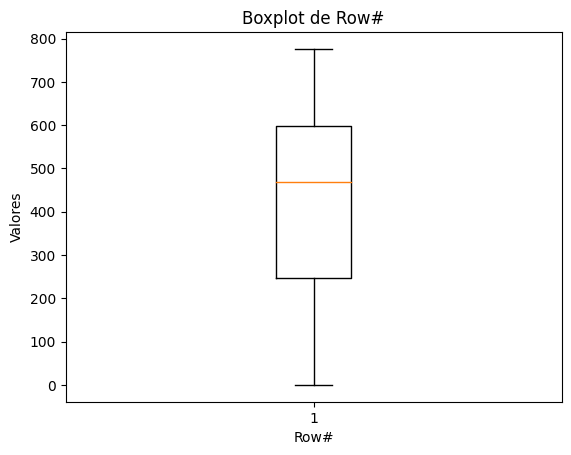

In [11]:
plt.boxplot('Row#', data=train)
plt.title('Boxplot de Row#')
plt.xlabel('Row#')
plt.ylabel('Valores')
plt.show()

Como esta variable no parece tener mucha utilidad, la eliminamos.

In [12]:
train = train.drop(columns=['Row#'])

### Histograma de todas las variables

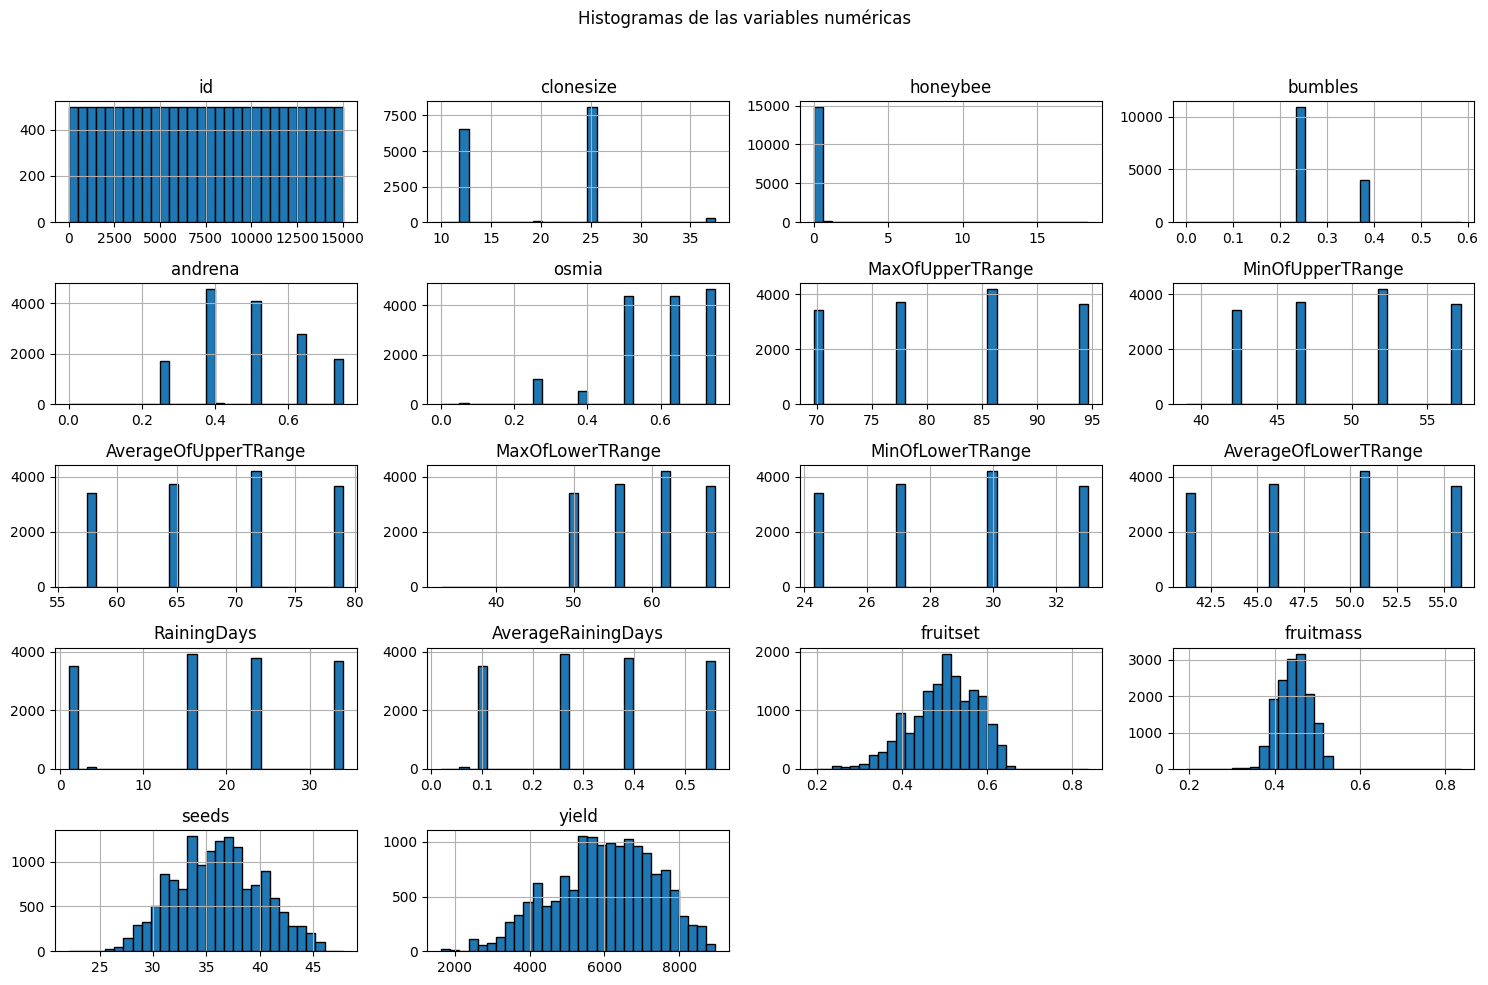

In [13]:
train.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Histogramas de las variables numéricas')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


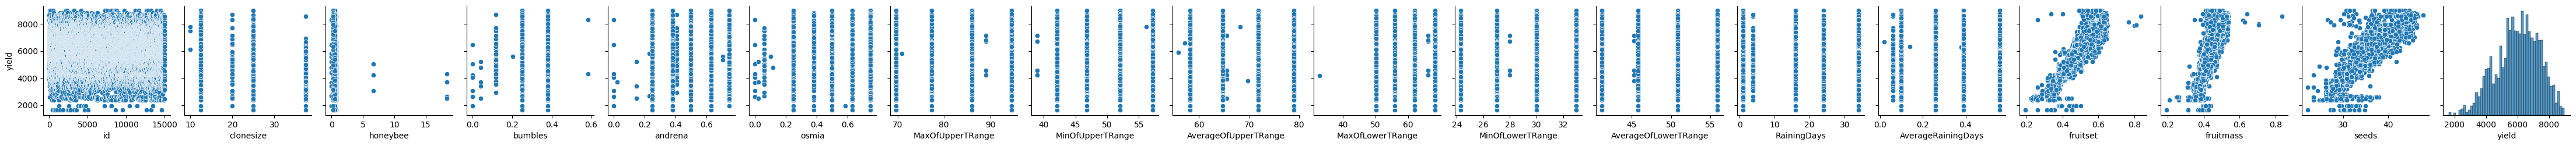

In [14]:
# sacamos los diagramas respecto a yield
sns.pairplot(train, y_vars='yield')

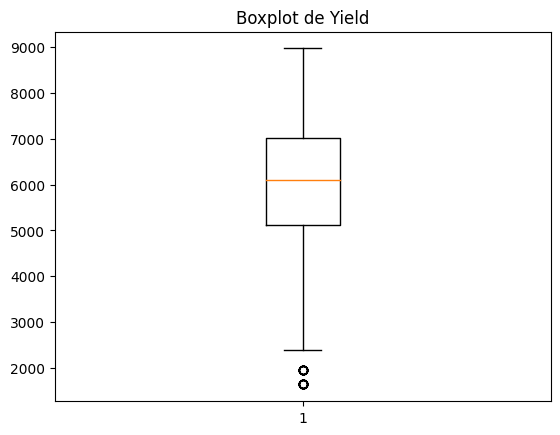

In [15]:
plt.boxplot(train['yield'])
plt.title('Boxplot de Yield')
plt.show()

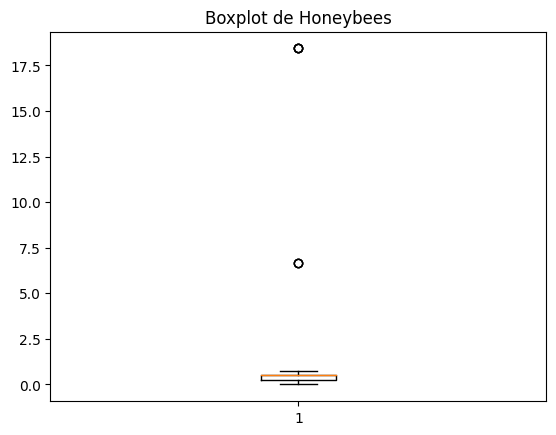

In [16]:
plt.boxplot(train['honeybee'])
plt.title('Boxplot de Honeybees')
plt.show()

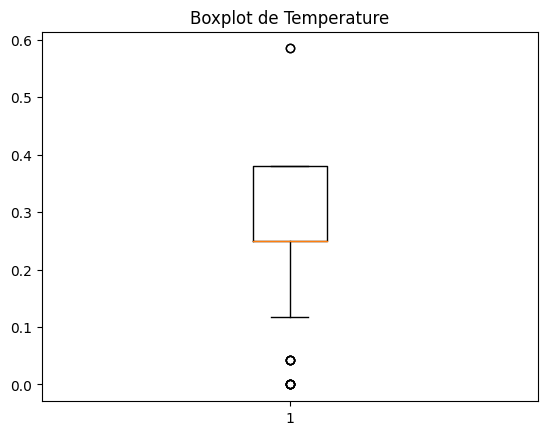

In [17]:
plt.boxplot(train['bumbles'])
plt.title('Boxplot de Temperature')
plt.show()

# Transformaciones

In [18]:
from scipy import stats
train.duplicated().sum()

0

In [19]:
train

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,12.5,0.25,0.25,0.75,0.63,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.579982,0.466183,39.288162,7660.88604
1,1,25.0,0.50,0.38,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.476202,0.413904,34.744180,5946.05226
2,2,12.5,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.442693,0.427277,34.159346,4867.94772
3,3,25.0,0.50,0.25,0.50,0.75,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.389453,0.381768,29.833158,4042.84264
4,4,12.5,0.25,0.38,0.38,0.75,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.633463,0.517160,44.278583,8254.12654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,25.0,0.50,0.25,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.525063,0.462462,37.033298,6493.47253
14996,14996,25.0,0.50,0.38,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.384646,0.395636,29.742583,3826.17226
14997,14997,25.0,0.50,0.38,0.50,0.75,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.462752,0.437923,34.702412,5367.61826
14998,14998,12.5,0.25,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.517723,0.460369,37.379452,6328.89332


No hay duplicados, por lo que no es necesario eliminarlos.


Elimino la variable que quiero predecir, que es yield.

In [20]:
X = train.drop(columns=["id",'yield'])
Y = train['yield']

Procedo a normalizar los datos, ya que las variables tienen diferentes escalas.

In [21]:
scaler = MinMaxScaler()

pd_normalizado = scaler.fit_transform(X)

Ahora, hago PCA

In [22]:
modelo = PCA(n_components=12)
modelo.fit_transform(pd_normalizado)

array([[ 1.09445403e+00, -2.62690738e-01, -3.17745565e-01, ...,
         6.02297511e-03, -8.84321793e-03,  6.08133188e-04],
       [ 1.11486072e+00,  6.20431335e-01,  6.20034896e-02, ...,
         1.96488172e-02, -1.34788957e-02,  6.30604239e-07],
       [-3.15495130e-01,  6.41851388e-01, -1.93688834e-01, ...,
        -2.00591112e-03,  2.88070953e-03, -1.64356542e-04],
       ...,
       [-3.30048468e-01, -1.05725166e-01,  1.81593474e-01, ...,
        -7.96418103e-03,  7.70251466e-03, -7.08901419e-04],
       [-1.09553022e+00, -6.98579035e-01, -1.50717530e-01, ...,
        -1.41198269e-03, -7.21362761e-04,  1.91155551e-04],
       [-3.22479802e-01,  1.69789375e-01, -2.92403436e-01, ...,
        -4.33833910e-03,  9.72974147e-04, -9.70424875e-04]])

Text(0, 0.5, 'cumulative explained variance')

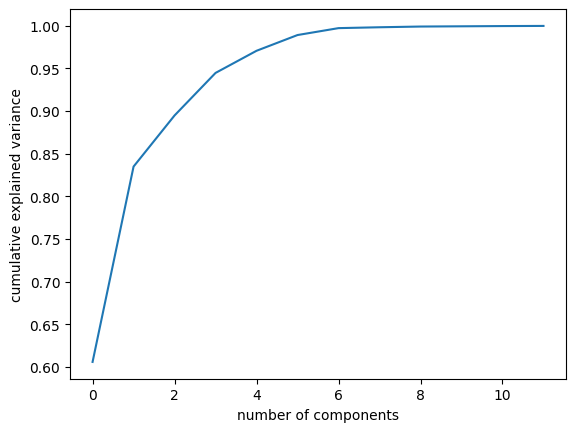

In [23]:


plt.plot(modelo.explained_variance_ratio_.cumsum())
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')



Escogeremos 5 componentes principales, ya que sobre con 5 componentes explicamos el 95% de la varianza.

In [24]:
modelo = PCA(n_components=5)
pd_pca=pd.DataFrame(modelo.fit_transform(pd_normalizado))
entrenamiento_listo = pd_normalizado

# Análisis de regresión

In [25]:
# Importamos el dataset de prueba
test = pd.read_csv("/kaggle/input/prac5-ia-unne-2025/test.csv")
X_test = test.drop(columns=["id","Row#"])
# Normalizamos el dataset de prueba usando el mismo scaler
test_escalado = pd.DataFrame(scaler.transform(X_test))
# Aplicamos la transformación PCA usando el mismo modelo
test_pca = pd.DataFrame(modelo.transform(test_escalado))
test_listo = test_escalado

In [26]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
# modelo_reg =  MLPRegressor(hidden_layer_sizes=(38,33,35))
modelo_reg = HistGradientBoostingRegressor()
# Entrenamos el modelo de regresión lineal con los datos de entrenamiento
modelo_reg.fit(entrenamiento_listo, Y)
predicciones = modelo_reg.predict(test_listo)

In [27]:
# Ponemos el id (primera columna del dataset de test) en el DataFrame de predicciones
predicciones = pd.DataFrame(
    {
    "id": test["id"],
    "yield": predicciones
    }
)
print(predicciones)

         id        yield
0     15000  4377.306503
1     15001  7087.372379
2     15002  8212.751831
3     15003  3002.760006
4     15004  6132.427706
...     ...          ...
9995  24995  3789.741215
9996  24996  3346.352872
9997  24997  6455.378472
9998  24998  7517.366950
9999  24999  8211.128639

[10000 rows x 2 columns]


In [28]:
# Guardamos las predicciones en un archivo CSV
predicciones.to_csv('predicciones_HGBR_'+datetime.datetime.now().strftime("%Y%m%d_%H%M%S")+'.csv'
                    , index=False)